In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Data loading

In [15]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [16]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [17]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
141,142,6.9,3.1,5.1,2.3,Iris-virginica
130,131,7.4,2.8,6.1,1.9,Iris-virginica
123,124,6.3,2.7,4.9,1.8,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa


In [18]:
df.shape

(150, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('darkgrid')

In [24]:
dt = df.rename({'SepalLengthCm': 'sepal_len', 'SepalWidthCm': 'sepal_wid', 'PetalLengthCm': 'petal_len', 'PetalWidthCm': 'petal_wid', 'Species': 'spec'}, axis=1)

<Axes: xlabel='spec', ylabel='count'>

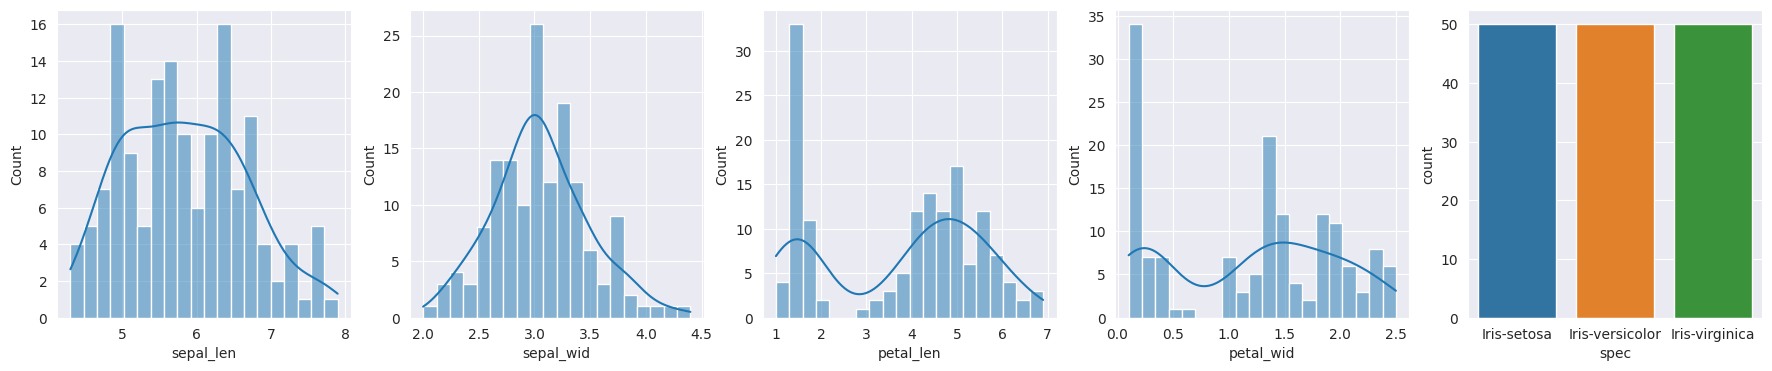

In [25]:
fig, ax = plt.subplots(ncols=5, figsize=(22, 4))
sns.histplot(x=dt['sepal_len'], bins=20, kde=True, ax=ax[0])
sns.histplot(x=dt['sepal_wid'], bins=20, kde=True, ax=ax[1])
sns.histplot(x=dt['petal_len'], bins=20, kde=True, ax=ax[2])
sns.histplot(x=dt['petal_wid'], bins=20, kde=True, ax=ax[3])
sns.countplot(x=dt['spec'])

<Axes: xlabel='Species'>

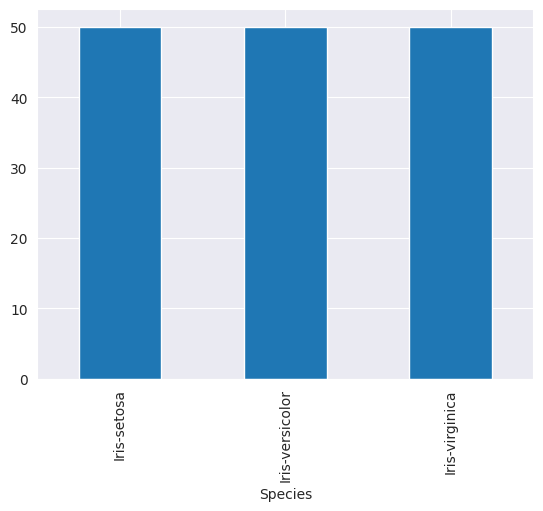

In [26]:
df['Species'].value_counts().plot(kind='bar')

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

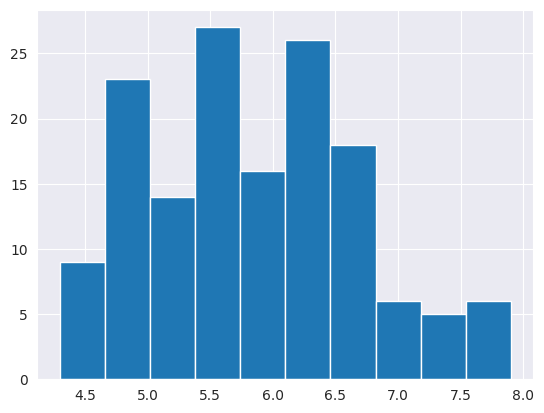

In [27]:
plt.hist(df['SepalLengthCm'])

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

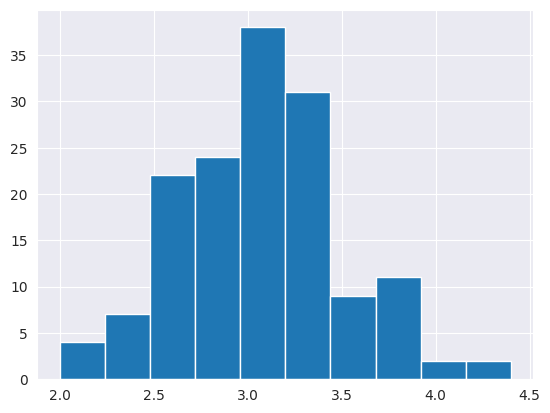

In [28]:
plt.hist(df['SepalWidthCm'])

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

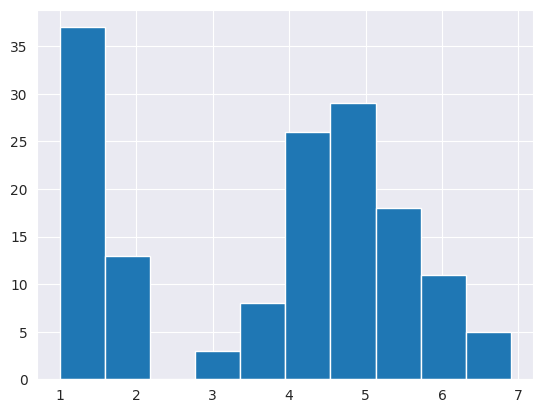

In [29]:
plt.hist(df['PetalLengthCm'])

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

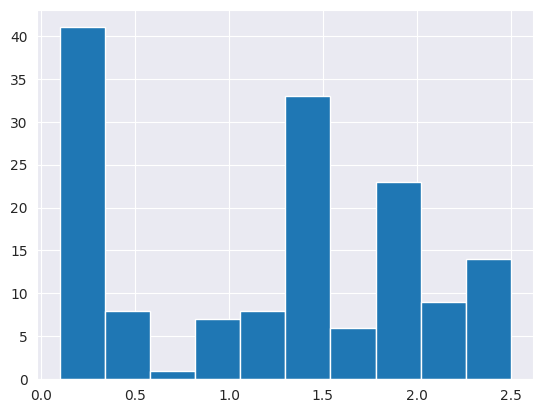

In [30]:
plt.hist(df['PetalWidthCm'])

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

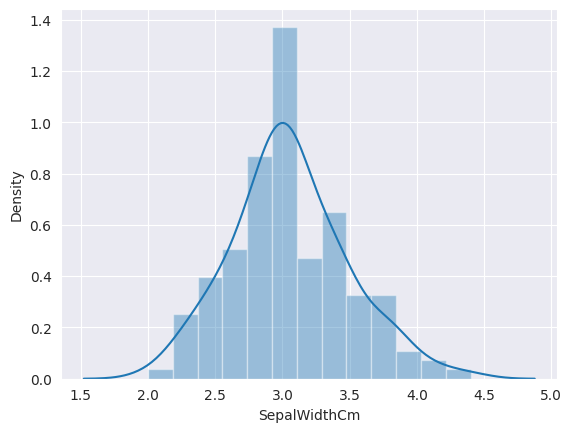

In [31]:
sns.distplot(df['SepalWidthCm'])

<Axes: >

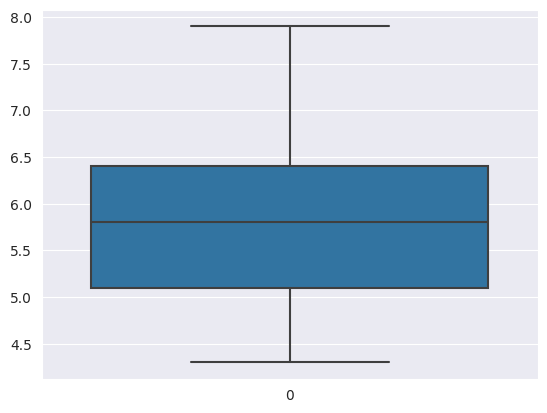

In [32]:
sns.boxplot(df['SepalLengthCm'])

<Axes: >

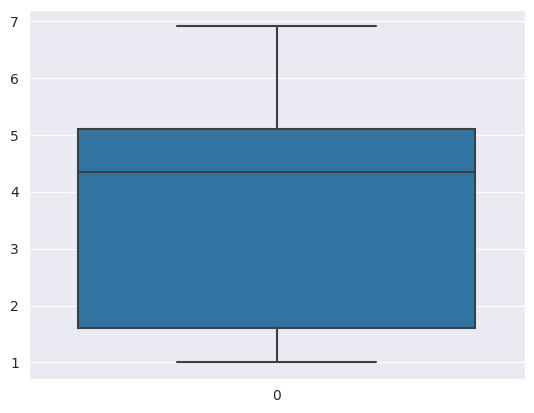

In [33]:
sns.boxplot(df['PetalLengthCm'])

<Axes: >

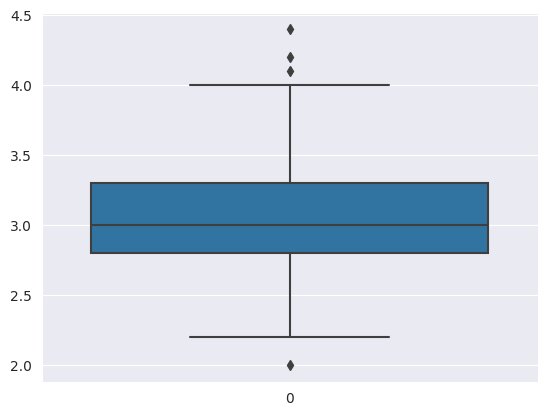

In [34]:
sns.boxplot(df['SepalWidthCm'])

<Axes: >

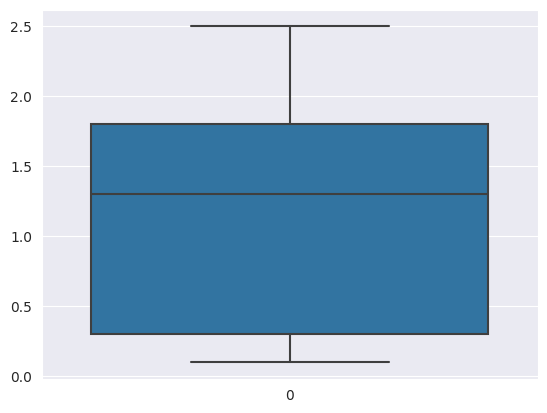

In [35]:
sns.boxplot(df['PetalWidthCm'])

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

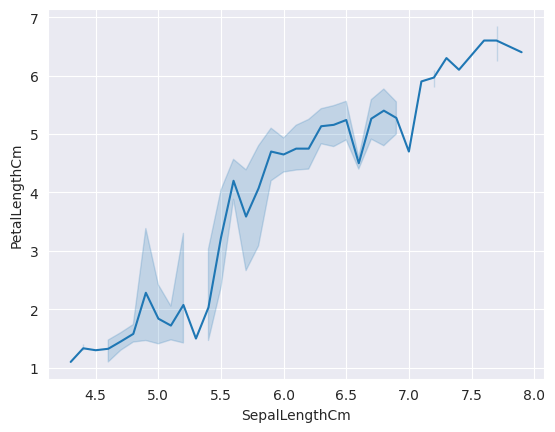

In [36]:
sns.lineplot(data=df, x='SepalLengthCm', y='PetalLengthCm')

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

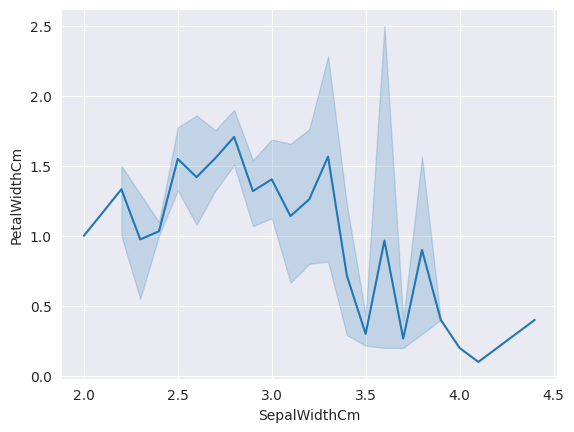

In [37]:
sns.lineplot(data=df, x='SepalWidthCm', y='PetalWidthCm')

In [38]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
30,31,4.8,3.1,1.6,0.2,Iris-setosa
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
129,130,7.2,3.0,5.8,1.6,Iris-virginica
113,114,5.7,2.5,5.0,2.0,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
X = df.drop(columns=['Id','Species'])
y = df['Species']

In [42]:
y = le.fit_transform(y)

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

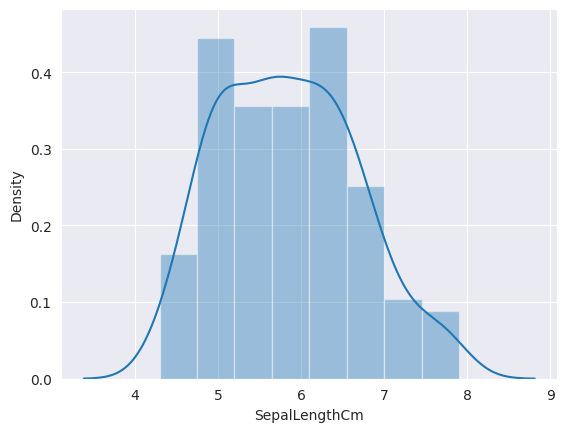

In [43]:
sns.distplot(df['SepalLengthCm'])

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

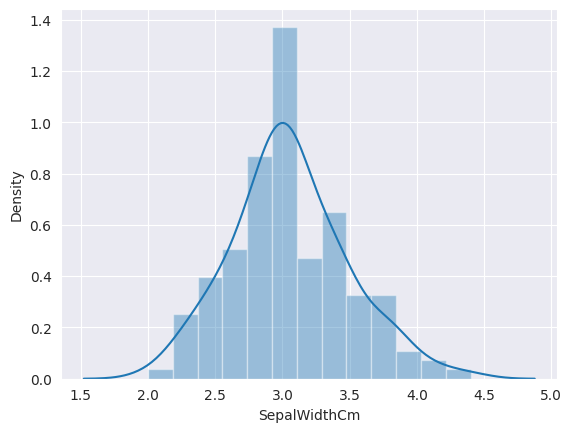

In [44]:
sns.distplot(df['SepalWidthCm'])

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

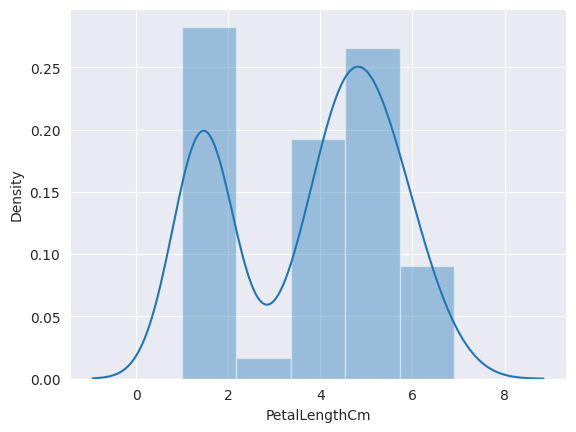

In [45]:
sns.distplot(df['PetalLengthCm'])

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

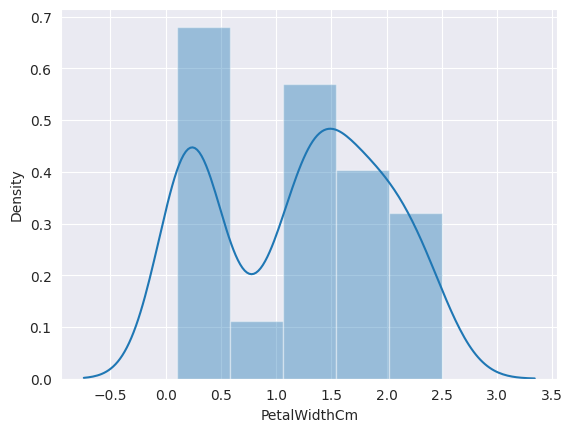

In [46]:
sns.distplot(df['PetalWidthCm'])

# Modelling

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 1.0
CV Score: 0.9733333333333334


In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 1.0
CV Score: 0.9666666666666668


In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 1.0
CV Score: 0.96


In [51]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 1.0
CV Score: 0.9533333333333334


In [52]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 1.0
CV Score: 0.96


In [53]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

Accuracy: 1.0
CV Score: 0.9466666666666667


In [54]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 1.0
CV Score: 0.9666666666666668
